**IMPORTING DATASETS AND LIBRARIES**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
df = pd.read_csv('/content/csv_result-EQ.csv')
df.head()


,id,ck_oo_numberOfPrivateMethods,LDHH_lcom,LDHH_fanIn,numberOfNonTrivialBugsFoundUntil:,WCHU_numberOfPublicAttributes,WCHU_numberOfAttributes,CvsWEntropy,LDHH_numberOfPublicMethods,WCHU_fanIn,...,LDHH_fanOut,LDHH_numberOfMethodsInherited,LDHH_rfc,ck_oo_numberOfMethodsInherited,ck_oo_numberOfPublicMethods,LDHH_cbo,WCHU_numberOfLinesOfCode,CvsExpEntropy,LDHH_numberOfMethods,class
0,1,3,0.002547,0.002555,4,0.00,3.04,0.393707,0.003049,1.01,...,0.005627,0.000000,0.004406,8,8,0.008431,3.50,0.103594,0.003611,buggy
1,2,37,0.008643,0.004756,71,0.00,14.37,2.093750,0.001481,2.02,...,0.018761,0.001486,0.060301,7,7,0.021602,43.12,0.328692,0.009906,buggy
2,3,3,0.001479,0.009143,5,1.01,3.08,0.484675,0.000000,6.17,...,0.003117,0.001486,0.002325,7,2,0.011859,4.68,0.125841,0.001655,clean
3,4,10,0.005642,0.005395,38,0.00,1.06,0.811584,0.000876,6.07,...,0.020376,0.002338,0.030608,17,10,0.020478,24.06,0.170416,0.007000,buggy
4,5,1,0.001350,0.000000,1,1.01,1.01,0.031940,0.000876,0.00,...,0.000566,0.003017,0.001492,22,7,0.000652,2.13,0.055912,0.001572,buggy


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

from tqdm import tqdm

## EDA

* import some dependencies to plot
* use plotly to visualization
    * label classification
        * count and plot(visualization)
    * value visualization
        * use historgram to visualization attribution
        * relationship
            * covariance
            * heatmap
    * scatter

In [4]:
# import some dependencies for plotting

from plotly.offline import iplot
import plotly.graph_objs as go

In [5]:
# check data
def show_info(data, is_matrix_transpose=False):
    # basic shape
    print('data shape is: {}   sample number {}   attribute number {}\n'.format(df.shape, df.shape[0], df.shape[1]))
    # attribute(key)
    print('data columns number {}  \nall columns: {}\n'.format(len(df.columns) ,df.columns))
    # value's null
    print('data all attribute count null:\n', df.isna().sum())
    # data value analysis and data demo
    if is_matrix_transpose:
        print('data value analysis: ', df.describe().T)
        print('data demo without matrix transpose: ', df.head().T)
    else:
        print('data value analysis: ', df.describe())
        print('data demo without matrix transpose: ', df.head())

show_info(df)

data shape is: (324, 63)   sample number 324   attribute number 63

data columns number 63  
all columns: Index(['id', 'ck_oo_numberOfPrivateMethods', 'LDHH_lcom', 'LDHH_fanIn',
       'numberOfNonTrivialBugsFoundUntil:', 'WCHU_numberOfPublicAttributes',
       'WCHU_numberOfAttributes', 'CvsWEntropy', 'LDHH_numberOfPublicMethods',
       'WCHU_fanIn', 'LDHH_numberOfPrivateAttributes', 'CvsEntropy',
       'LDHH_numberOfPublicAttributes', 'WCHU_numberOfPrivateMethods',
       'WCHU_numberOfMethods', 'ck_oo_numberOfPublicAttributes', 'ck_oo_noc',
       'numberOfCriticalBugsFoundUntil:', 'ck_oo_wmc',
       'LDHH_numberOfPrivateMethods', 'WCHU_numberOfPrivateAttributes',
       'CvsLogEntropy', 'WCHU_noc', 'LDHH_numberOfAttributesInherited',
       'WCHU_wmc', 'ck_oo_fanOut', 'ck_oo_numberOfLinesOfCode',
       'ck_oo_numberOfAttributesInherited', 'ck_oo_numberOfMethods',
       'ck_oo_dit', 'ck_oo_fanIn', 'LDHH_noc', 'WCHU_dit', 'ck_oo_lcom',
       'WCHU_numberOfAttributesInherited', 

<Axes: >

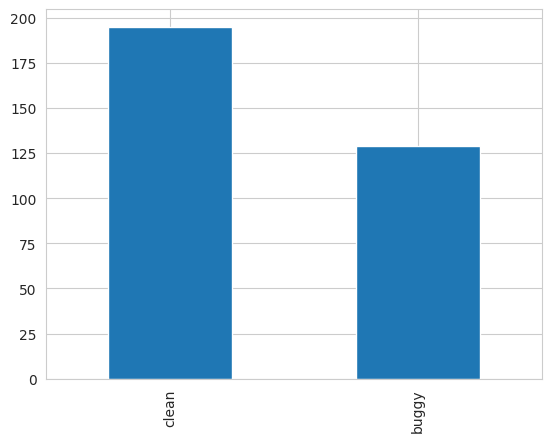

In [6]:
# label classification
df['class'].value_counts().plot.bar()

Class Label

In [7]:
from sklearn.preprocessing import LabelEncoder
# finding the count of different labels
df['class'].value_counts()

clean    195
buggy    129
Name: class, dtype: int64

In [8]:
# load the Label Encoder function
label_encode = LabelEncoder()

In [9]:
labels = label_encode.fit_transform(df["class"])

In [10]:
# appending the labels to the DataFrame
df["class"] = labels

<Axes: >

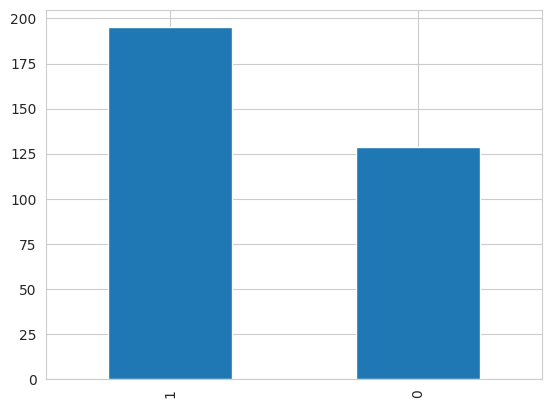

In [11]:
# label classification
df['class'].value_counts().plot.bar()

In [12]:
df.corr()

,id,ck_oo_numberOfPrivateMethods,LDHH_lcom,LDHH_fanIn,numberOfNonTrivialBugsFoundUntil:,WCHU_numberOfPublicAttributes,WCHU_numberOfAttributes,CvsWEntropy,LDHH_numberOfPublicMethods,WCHU_fanIn,...,LDHH_fanOut,LDHH_numberOfMethodsInherited,LDHH_rfc,ck_oo_numberOfMethodsInherited,ck_oo_numberOfPublicMethods,LDHH_cbo,WCHU_numberOfLinesOfCode,CvsExpEntropy,LDHH_numberOfMethods,class
id,1.000000,-0.100516,-0.048358,0.013203,-0.061909,-0.068034,-0.070977,-0.072091,0.029668,-0.013114,...,-0.022524,-0.020168,-0.058857,-0.014713,-0.027723,-0.030178,-0.065483,-0.038868,-0.049463,0.099331
ck_oo_numberOfPrivateMethods,-0.100516,1.000000,0.569849,0.055677,0.715696,0.133975,0.566075,0.738146,0.148023,0.121915,...,0.584847,0.023700,0.724373,-0.029662,0.180446,0.495247,0.718291,0.553600,0.570174,-0.262637
LDHH_lcom,-0.048358,0.569849,1.000000,0.272784,0.734496,0.229453,0.582325,0.671792,0.651498,0.321394,...,0.760037,0.368277,0.810068,0.144503,0.414374,0.689506,0.823965,0.575086,0.998046,-0.312516
LDHH_fanIn,0.013203,0.055677,0.272784,1.000000,0.301897,0.131744,0.204415,0.255490,0.252247,0.839821,...,0.332180,0.110914,0.276044,0.042015,0.318354,0.663645,0.278659,0.301717,0.274576,-0.318088
numberOfNonTrivialBugsFoundUntil:,-0.061909,0.715696,0.734496,0.301897,1.000000,0.320043,0.749151,0.828011,0.391547,0.382895,...,0.766718,0.255904,0.893249,0.155570,0.303900,0.709185,0.934818,0.711977,0.738909,-0.342137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LDHH_cbo,-0.030178,0.495247,0.689506,0.663645,0.709185,0.223037,0.564599,0.652916,0.479449,0.692939,...,0.872373,0.213532,0.735798,0.102100,0.470521,1.000000,0.730110,0.602797,0.692619,-0.404423
WCHU_numberOfLinesOfCode,-0.065483,0.718291,0.823965,0.278659,0.934818,0.257866,0.702389,0.862694,0.443442,0.379685,...,0.807373,0.290607,0.926397,0.178679,0.359524,0.730110,1.000000,0.704026,0.828892,-0.375066
CvsExpEntropy,-0.038868,0.553600,0.575086,0.301717,0.711977,0.221774,0.584443,0.700662,0.413788,0.304832,...,0.636630,0.180692,0.763199,0.157809,0.341177,0.602797,0.704026,1.000000,0.576188,-0.420258
LDHH_numberOfMethods,-0.049463,0.570174,0.998046,0.274576,0.738909,0.229929,0.585741,0.677568,0.651115,0.324481,...,0.764329,0.370344,0.815448,0.140264,0.410365,0.692619,0.828892,0.576188,1.000000,-0.317861


<ipython-input-13-4abd0cdf933f>:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.



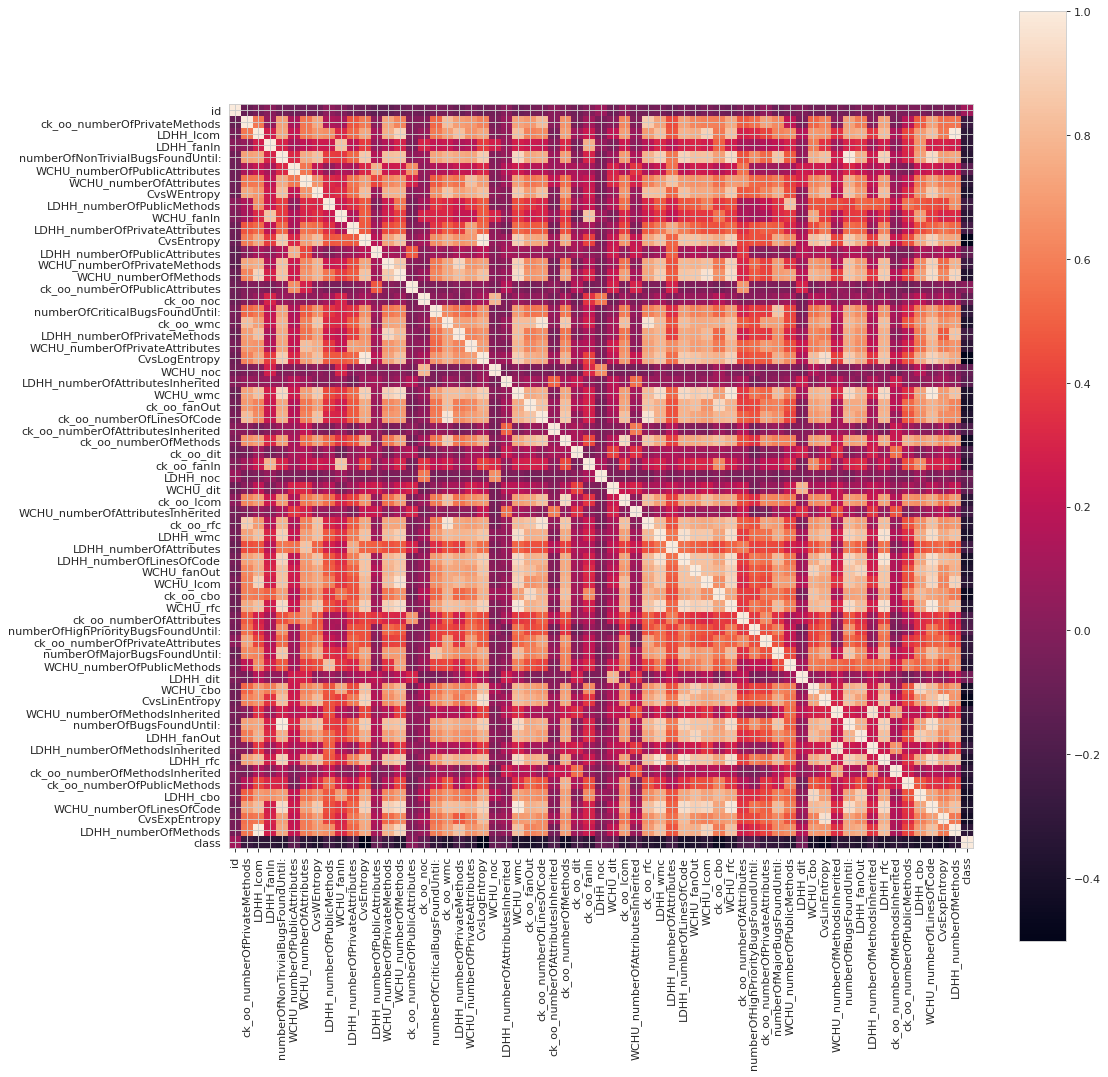

In [13]:
# plot corr
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

plotCorrelationMatrix(df, 15)

<ipython-input-14-6ec3fc198971>:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.



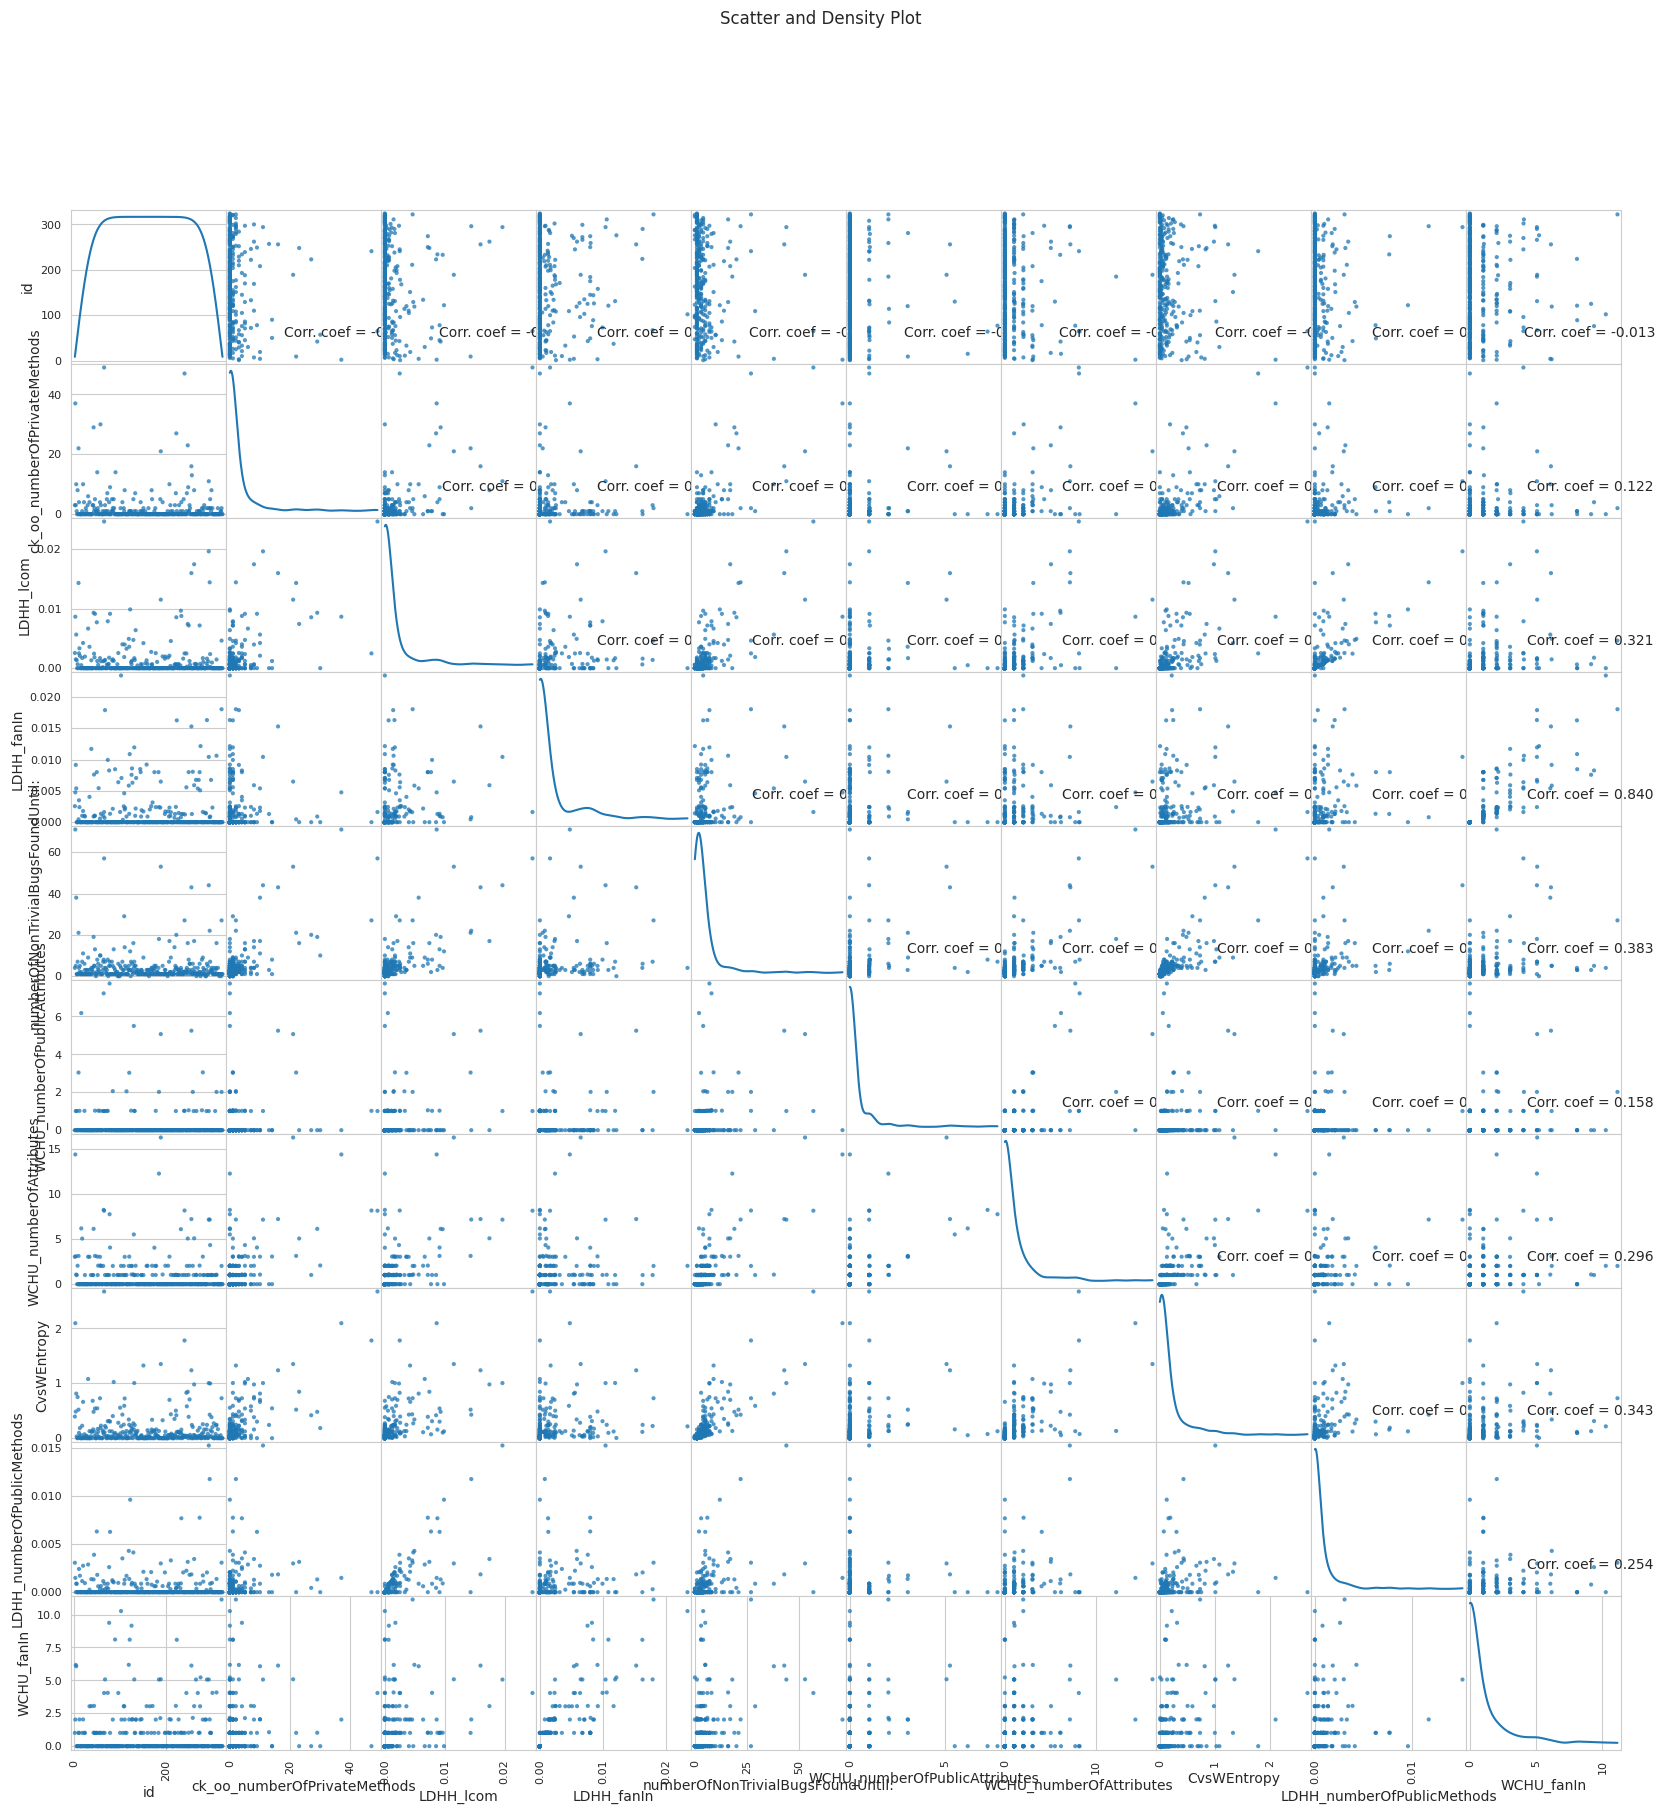

In [14]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(df, 20, 10)

**NORMALIZATION**

In [15]:
from sklearn import preprocessing
def change(X):
    length = X.shape[0]
    d=pd.Series(np.ones((length)))
    for i in range(0, length, 73):
        d[i]=0
    return d
def a(X):
    length = X.shape[0]
    d=pd.Series(np.zeros((length)))
    for i in range(0, length, 20):
        d[i]=1
    return d


In [16]:
def change(X):
    length = X.shape[0]
    d=pd.Series(np.ones((length)))
    for i in range(0, length, 73):
        d[i]=0
    return d
def a(X):
    length = X.shape[0]
    d=pd.Series(np.zeros((length)))
    for i in range(0, length, 20):
        d[i]=1
    return d

**SMOTE-TOMEK**

In [17]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [18]:
pip install imblearn

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from collections import Counter


# Assuming the last column is the target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE-Tomek only on the training data
smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)




<ipython-input-20-996aeb56b06b>:5: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



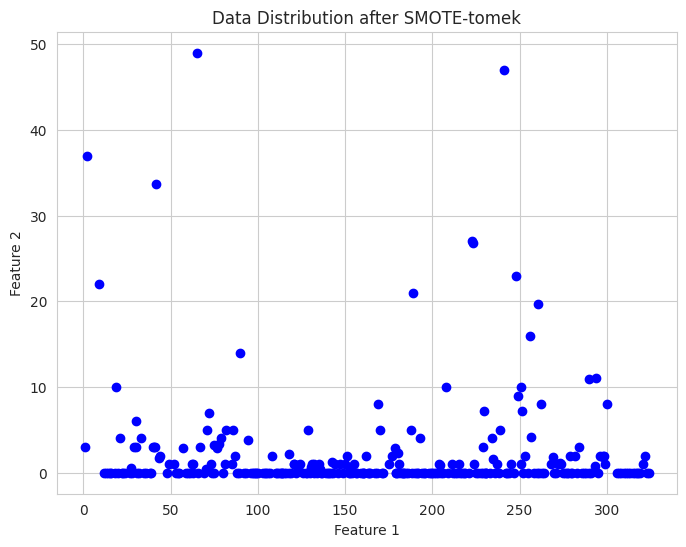

In [20]:
from imblearn.combine import SMOTETomek

# Visualize the data distribution after applying SMOTE
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c='blue', cmap=plt.cm.Paired, marker='o')
plt.title("Data Distribution after SMOTE-tomek")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**KNN**

In [21]:
pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score



In [23]:
import math
math.sqrt(len(y_test))

8.06225774829855

In [24]:
#Define the model
knn_model = KNeighborsClassifier(n_neighbors=8, p=2, metric='euclidean')
#fit model
knn_model.fit(X_resampled, y_resampled)


KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [25]:
X_test.shape

(65, 62)

In [26]:
# Assuming the last column is the target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE-Tomek only on the training data
smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

In [27]:
# Predict the test set results
knn_pred = knn_model.predict(X_test)
y_pred = knn_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [28]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print (cm)


[[21  7]
 [22 15]]


In [29]:
print(accuracy_score(y_test, y_pred))

0.5538461538461539


**DECISION TREE**

In [30]:
#import the necessary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt

In [31]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
feature_names = X_train
dt_model = DecisionTreeClassifier(criterion='entropy',random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [33]:
# Assuming the last column is the target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE-Tomek only on the training data
smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

In [34]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

Accuracy: 1.00


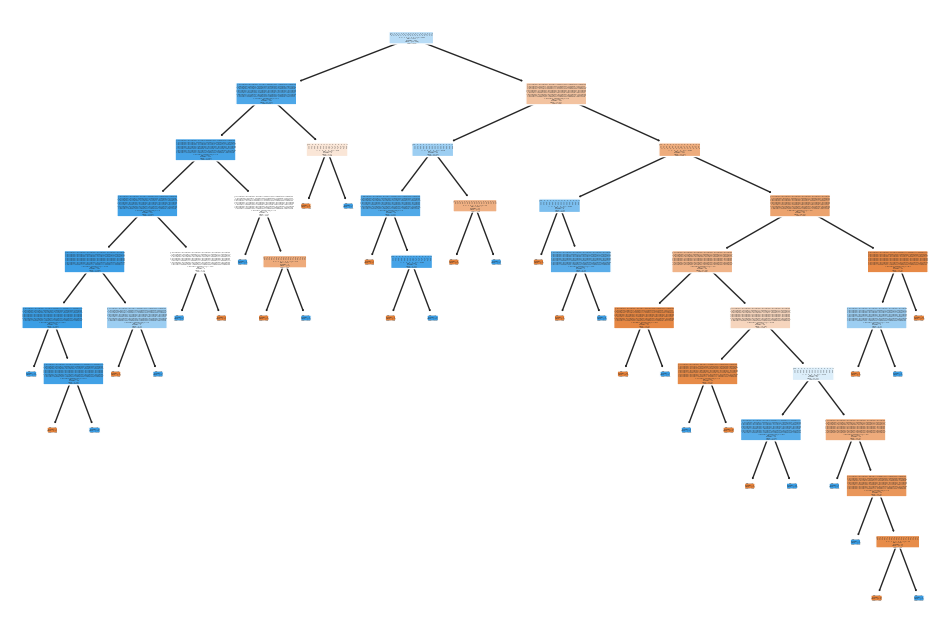

In [35]:
# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate and print the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_model, feature_names=feature_names, class_names=['True','False'], filled=True, rounded=True)
plt.show()

In [36]:
#function to perform training with entropy
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model= dt_model.fit(X_resampled, y_resampled)

In [37]:
y_pred_en = dt_model.predict(X_test)
y_pred_en

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0])

In [38]:
print ("Accuracy is "),metrics.accuracy_score(y_test,y_pred_en)*100


Accuracy is 


(None, 66.15384615384615)

[Text(0.42045454545454547, 0.9583333333333334, 'x[60] <= 0.001\nentropy = 1.0\nsamples = 286\nvalue = [143, 143]'),
 Text(0.22727272727272727, 0.875, 'x[33] <= 2.0\nentropy = 0.429\nsamples = 114\nvalue = [10, 104]'),
 Text(0.18181818181818182, 0.7916666666666666, 'entropy = 0.0\nsamples = 72\nvalue = [0, 72]'),
 Text(0.2727272727272727, 0.7916666666666666, 'x[16] <= 0.087\nentropy = 0.792\nsamples = 42\nvalue = [10, 32]'),
 Text(0.22727272727272727, 0.7083333333333334, 'x[27] <= 2.5\nentropy = 0.629\nsamples = 38\nvalue = [6, 32]'),
 Text(0.18181818181818182, 0.625, 'x[7] <= 0.013\nentropy = 0.422\nsamples = 35\nvalue = [3, 32]'),
 Text(0.13636363636363635, 0.5416666666666666, 'x[25] <= 7.5\nentropy = 0.811\nsamples = 12\nvalue = [3, 9]'),
 Text(0.09090909090909091, 0.4583333333333333, 'x[7] <= 0.009\nentropy = 0.469\nsamples = 10\nvalue = [1, 9]'),
 Text(0.045454545454545456, 0.375, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.13636363636363635, 0.375, 'entropy = 0.0\nsampl

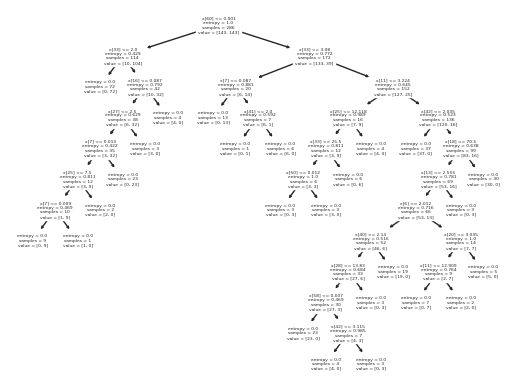

In [39]:
from sklearn import tree
tree.plot_tree(dt_model)

**SVM**

In [40]:
from sklearn.svm import SVC
svm_model = SVC()

In [41]:
svm_model.fit(X_resampled, y_resampled)

SVC()

In [42]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [43]:
svm_model.score(X_test, y_test)

0.6

In [44]:
svm_model.predict(X_test)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1])

In [45]:
#Tune parameters
#1. Regularization (C)
svm_model_C = SVC(C=1)
svm_model_C.fit(X_resampled, y_resampled)
svm_model_C.score(X_test, y_test)

0.6307692307692307

In [46]:
svm_model_C = SVC(C=10)
svm_model_C.fit(X_resampled, y_resampled)
svm_model_C.score(X_test, y_test)

0.6307692307692307

**NAIVE**

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [48]:
from sklearn.naive_bayes import GaussianNB

# Assuming X contains numerical features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the classifier
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.43      0.55        28
           1       0.67      0.89      0.77        37

    accuracy                           0.69        65
   macro avg       0.71      0.66      0.66        65
weighted avg       0.71      0.69      0.67        65

Accuracy: 0.6923076923076923


In [49]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

**GENETIC ALGORITHM BASED ON ARTIFICAL NEURAL NETWORK (GA-ANN)**

In [50]:
pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.8 MB/s eta 0:00:00


In [51]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define genetic algorithm parameters
population_size = 10
num_generations = 5
mutation_rate = 0.1

# Function to create a simple feedforward neural network
def create_neural_network():
    model = keras.Sequential([
        keras.layers.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to initialize a random population of neural networks
def initialize_population(population_size):
    return [create_neural_network() for _ in range(population_size)]

# Function to evaluate the fitness of each neural network in the population
def evaluate_population(population, X_train, y_train, X_test, y_test):
    fitness_scores = []
    for model in population:
        model.fit(X_train, y_train, epochs=5, verbose=0)
        predictions = (model.predict(X_test) > 0.5).astype(int).flatten()
        accuracy = accuracy_score(y_test, predictions)
        fitness_scores.append(accuracy)
    return fitness_scores

# Function for tournament selection
def tournament_selection(fitness_scores, tournament_size):
    selected_indices = []
    for _ in range(len(fitness_scores)):
        tournament_indices = np.random.choice(len(fitness_scores), tournament_size, replace=False)
        winner_index = max(tournament_indices, key=lambda i: fitness_scores[i])
        selected_indices.append(winner_index)
    return selected_indices

# Function for one-point crossover
def crossover(parent1, parent2):
    child1 = create_neural_network()
    child2 = create_neural_network()

    for layer in range(len(child1.layers)):
        crossover_point = np.random.randint(0, 2)
        if crossover_point == 0:
            child1.layers[layer].set_weights(parent1.layers[layer].get_weights())
            child2.layers[layer].set_weights(parent2.layers[layer].get_weights())
        else:
            child1.layers[layer].set_weights(parent2.layers[layer].get_weights())
            child2.layers[layer].set_weights(parent1.layers[layer].get_weights())

    return child1, child2

# Function for mutation
def mutate(model, mutation_rate):
    for layer in range(len(model.layers)):
        if np.random.rand() < mutation_rate:
            new_weights = [w + np.random.normal(0, 0.1, w.shape) for w in model.layers[layer].get_weights()]
            model.layers[layer].set_weights(new_weights)
    return model

# Main genetic algorithm loop
population = initialize_population(population_size)

# Lists to store evolution data
gen_numbers = []
max_accuracies = []

for generation in range(num_generations):
    fitness_scores = evaluate_population(population, X_train, y_train, X_test, y_test)

    # Select parents using tournament selection
    selected_indices = tournament_selection(fitness_scores, tournament_size=2)

    # Create new generation using crossover and mutation
    new_population = []
    for i in range(0, len(selected_indices), 2):
        parent1 = population[selected_indices[i]]
        parent2 = population[selected_indices[i + 1]]
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)
        new_population.extend([child1, child2])

    population = new_population

    # Collect evolution data
    best_model = max(population, key=lambda model: accuracy_score(y_test, (model.predict(X_test) > 0.5).astype(int).flatten()))
    max_accuracy = accuracy_score(y_test, (best_model.predict(X_test) > 0.5).astype(int).flatten())

    gen_numbers.append(generation)
    max_accuracies.append(max_accuracy)



3/3 [==============================] - 0s 6ms/step


3/3 [==============================] - 0s 9ms/step


3/3 [==============================] - 0s 4ms/step


In [52]:
# Select the best neural network from the final population
best_model = max(population, key=lambda model: accuracy_score(y_test, (model.predict(X_test) > 0.5).astype(int).flatten()))
print("Best Neural Network Accuracy:", accuracy_score(y_test, (best_model.predict(X_test) > 0.5).astype(int).flatten()))

3/3 [==============================] - 0s 4ms/step
Best Neural Network Accuracy: 0.6461538461538462


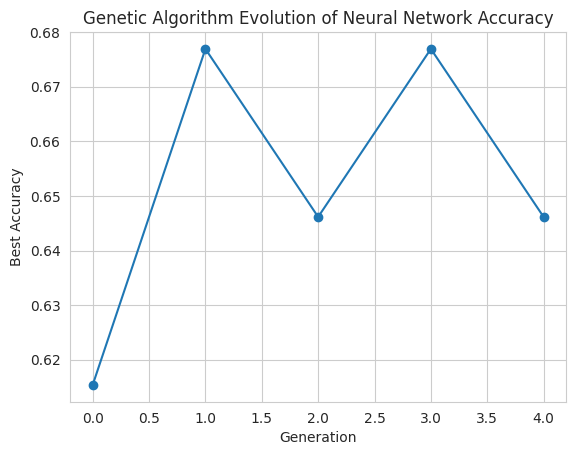

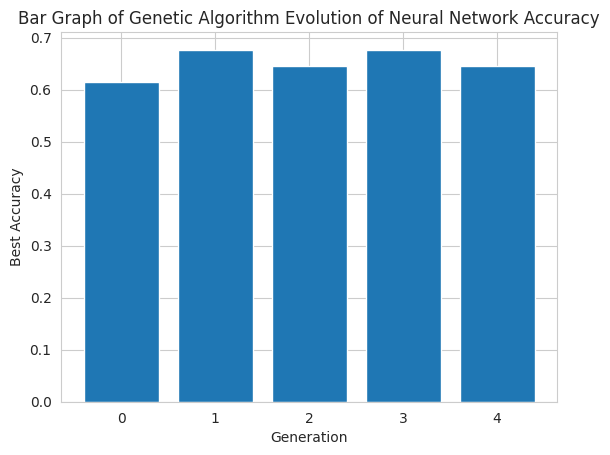

In [53]:
# Plot the evolution of accuracy
plt.plot(gen_numbers, max_accuracies, marker='o')
plt.xlabel('Generation')
plt.ylabel('Best Accuracy')
plt.title('Genetic Algorithm Evolution of Neural Network Accuracy')
plt.show()

# Plot bar graph for accuracy
plt.bar(range(len(max_accuracies)), max_accuracies)
plt.xlabel('Generation')
plt.ylabel('Best Accuracy')
plt.title('Bar Graph of Genetic Algorithm Evolution of Neural Network Accuracy')
plt.show()

**EVALUATING OTHER ALGORITHMS**

Model: Decision Tree
Accuracy: 0.6000
Confusion Matrix:
[[12 16]
 [10 27]]

Model: KNN
Accuracy: 0.5538
Confusion Matrix:
[[21  7]
 [22 15]]

Model: SVM
Accuracy: 0.6000
Confusion Matrix:
[[10 18]
 [ 8 29]]

Model: Naive Bayes
Accuracy: 0.6923
Confusion Matrix:
[[12 16]
 [ 4 33]]



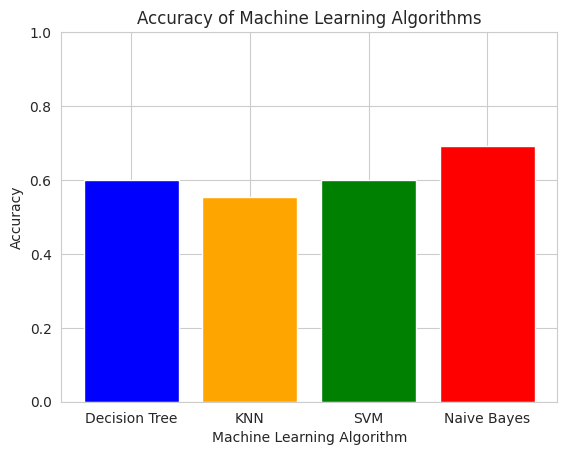

In [54]:
# Evaluate models and store results

models = {'Decision Tree': dt_pred,
          'KNN': knn_pred,
          'SVM': svm_pred,
          'Naive Bayes': nb_pred}

model_results = {}
for name, pred in models.items():
    acc = accuracy_score(y_test, pred)
    model_results[name] = acc
    cm = confusion_matrix(y_test, pred)
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Plot bar graph
plt.bar(model_results.keys(), model_results.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Machine Learning Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Machine Learning Algorithms')
plt.ylim([0, 1])  # Set the y-axis limit to better visualize differences
plt.show()